In [ ]:
!pip install tensorflow


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Traitement des images post augmentation**

**Des images aux extensions et aux formats hétérogènes**

Image: nouveau07.jfif
Shape: (183, 275, 3)
Format: uint8


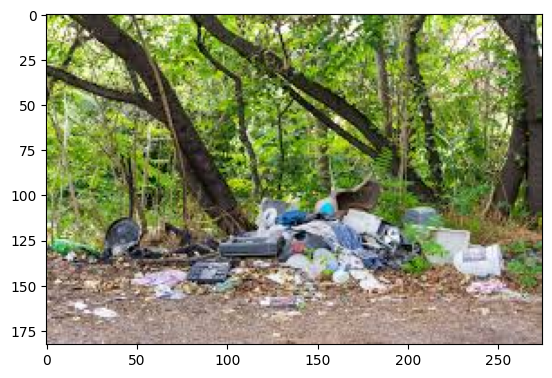

Image: nouveau01.jfif
Shape: (100, 100, 3)
Format: uint8


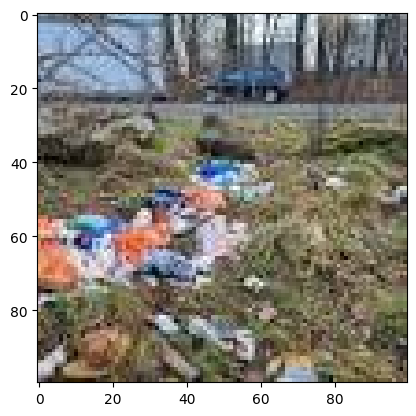

Image: nouveau07 (1).jfif
Shape: (201, 251, 3)
Format: uint8


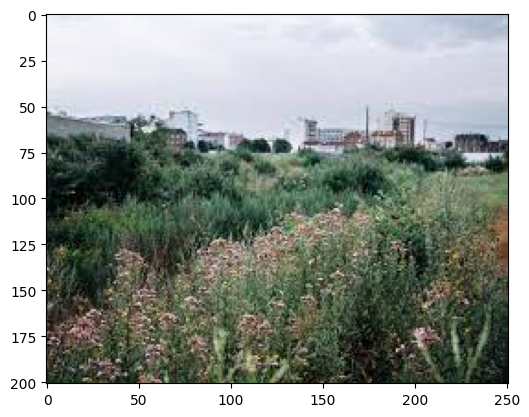

Image: nouveau09 (1).jfif
Shape: (183, 275, 3)
Format: uint8


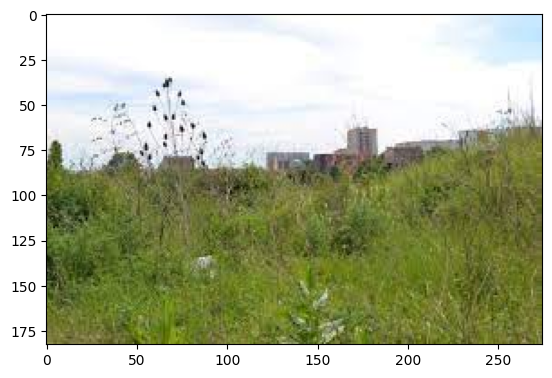

Image: nouveau03 (1).jfif
Shape: (100, 100, 3)
Format: uint8


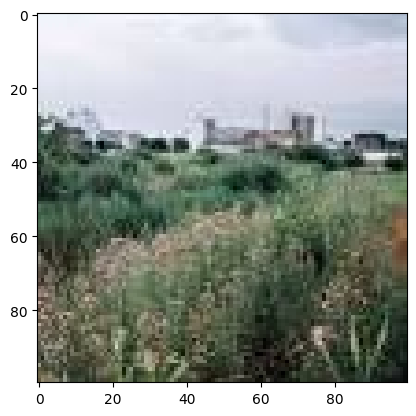

Image: nouveau02 (1).jfif
Shape: (100, 100, 3)
Format: uint8


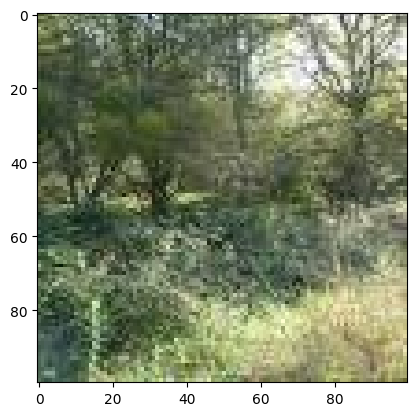

Image: nouveau06.jfif
Shape: (175, 289, 3)
Format: uint8


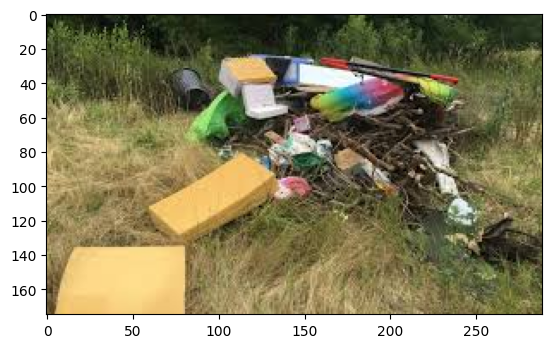

Image: nouveau03.jpg
Shape: (168, 300, 3)
Format: uint8


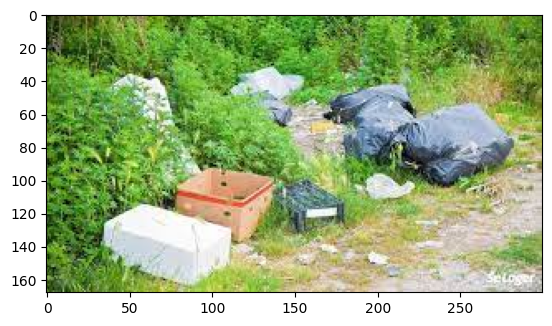

Image: nouveau04 (1).jfif
Shape: (100, 100, 3)
Format: uint8


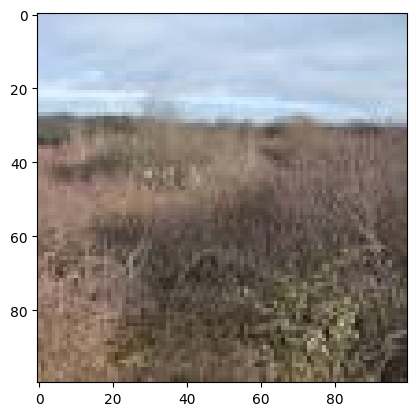

Image: nouveau04.jfif
Shape: (189, 266, 3)
Format: uint8


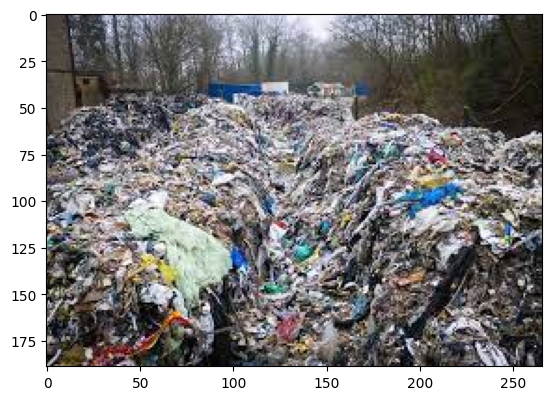

In [2]:
###CODE POUR AFFICHER LA SHAPE DE 10 IMAGES ALEATOIREMENT DANS LE DOSSIER

import os
train_dir = r"C:\Users\gaspa\Downloads\base_test"
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Récupérer la liste des noms de fichiers d'images
image_files = os.listdir(train_dir)

# Sélectionner 10 fichiers d'images de manière aléatoire
selected_images = random.sample(image_files, 10)

# Afficher les images sélectionnées avec leur shape et leur format
for image_file in selected_images:
    image_path = os.path.join(train_dir, image_file)
    image = mpimg.imread(image_path)
    print('Image:', image_file)
    print('Shape:', image.shape)
    print('Format:', image.dtype)
    plt.imshow(image)
    plt.show()

**Quels sont les extensions présentes dans le dossier ?**

In [3]:
import os

path = r"C:\Users\gaspa\Downloads\base_test" # Chemin vers le dossier à inspecter
extensions = set() # Initialisation d'un ensemble pour stocker les extensions de fichier uniques

for file_name in os.listdir(path): # Parcours de tous les fichiers dans le dossier
    extension = os.path.splitext(file_name)[1] # Récupération de l'extension du fichier
    extensions.add(extension) # Ajout de l'extension à l'ensemble

print("Extensions de fichiers présentes dans le dossier {}: {}".format(path, extensions))

Extensions de fichiers présentes dans le dossier C:\Users\gaspa\Downloads\base_test: {'.png', '.jpg', '.jfif'}


**On renomme les fichiers et on en profite pour les convertir en PNG**

In [4]:
import os

# Chemin vers le dossier contenant les éléments à renommer
folder_path = r"C:\Users\gaspa\Downloads\base_test\friches"

# Nom commun à utiliser pour tous les éléments renommés
new_name = "friche"

# Compteur pour le numéro d'ordre
count = 1

# Boucle pour renommer tous les éléments
for old_name in os.listdir(folder_path):
    # Créer le nouveau nom avec le numéro d'ordre
    new_name_with_count = new_name + str(count) + ".png"
    
    # Chemin complet vers l'élément à renommer
    old_path = os.path.join(folder_path, old_name)
    
    # Chemin complet vers l'élément renommé
    new_path = os.path.join(folder_path, new_name_with_count)
    
    # Renommer l'élément
    os.rename(old_path, new_path)
    
    # Incrémenter le compteur
    count += 1

**On redimensionne les images** 

In [5]:
import os
import cv2

# Définir les dossiers source et destination
src_folder = r"C:\Users\gaspa\Downloads\base_test\friches"
dst_folder = r"C:\Users\gaspa\Downloads\base_test\friches_2"

# Taille souhaitée pour les images
target_size = (200, 200)

# Itérer sur toutes les images dans le dossier source
for filename in os.listdir(src_folder):
    # Vérifier que le fichier est une image
    if filename.endswith('.jpg') or filename.endswith('.jfif') or filename.endswith('.png'):
        # Charger l'image
        img = cv2.imread(os.path.join(src_folder, filename))
        img_path = os.path.join(src_folder, filename)
        # Redimensionner l'image
        if img is not None:
            img_resized = cv2.resize(img, target_size)
        # Enregistrer l'image redimensionnée dans le dossier destination
            cv2.imwrite(os.path.join(dst_folder, filename), img_resized)
        else:
            print(f"Erreur de lecture de l'image: {img_path}")

**On affiche les images valides et les images corrompues**

Image: img_train162.png
Shape: (200, 200, 3)
Format: float32


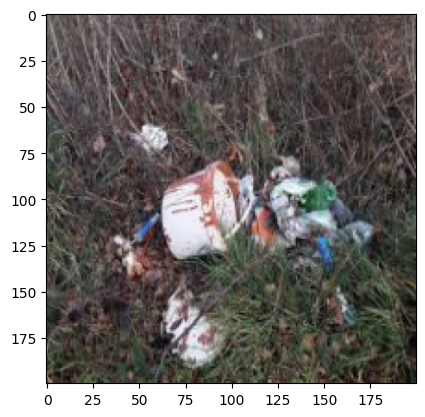

Image: img_train276.png
Shape: (200, 200, 3)
Format: float32


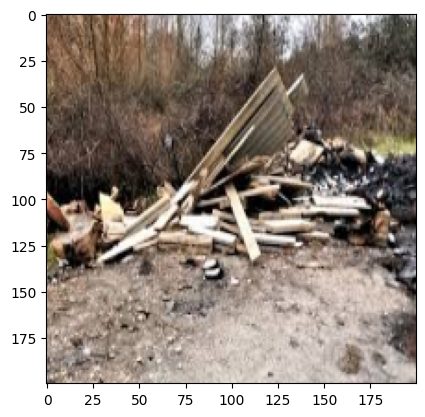

Image: img_train382.png
Shape: (200, 200, 3)
Format: float32


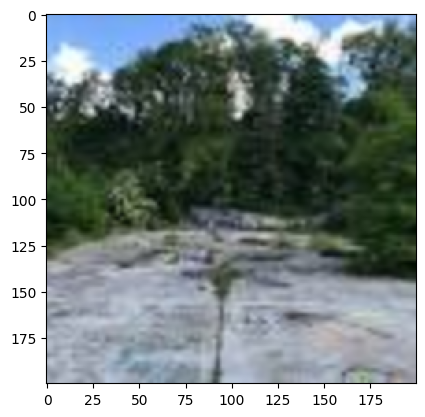

Image: img_train214.png
Shape: (200, 200, 3)
Format: float32


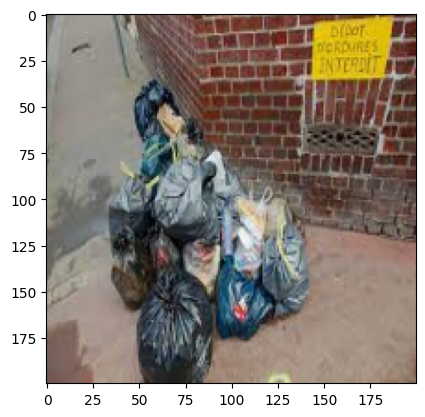

Image: img_train496.png
Shape: (200, 200, 3)
Format: float32


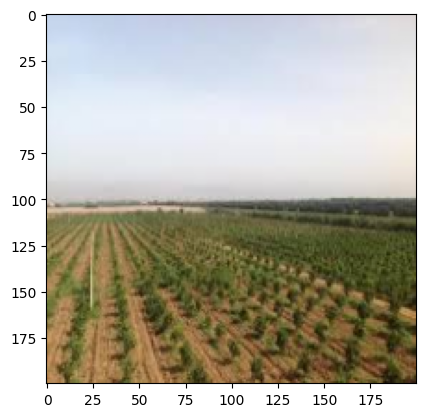

Image: img_train327.png
Shape: (200, 200, 3)
Format: float32


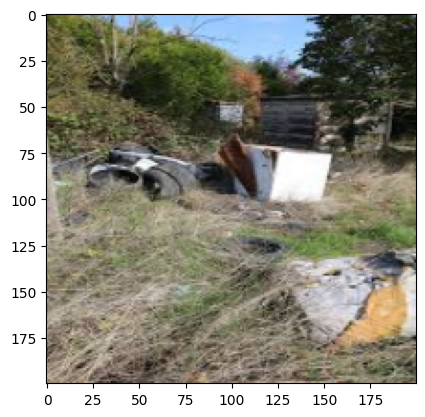

Image: img_train514.png
Shape: (200, 200, 3)
Format: float32


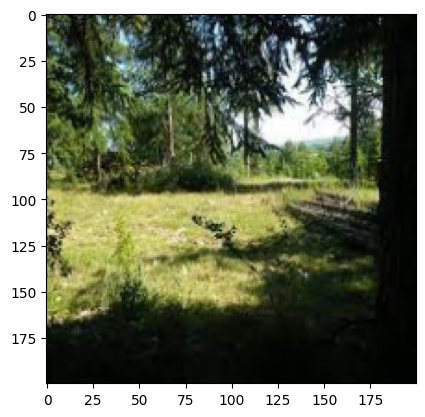

Image: img_train495.png
Shape: (200, 200, 3)
Format: float32


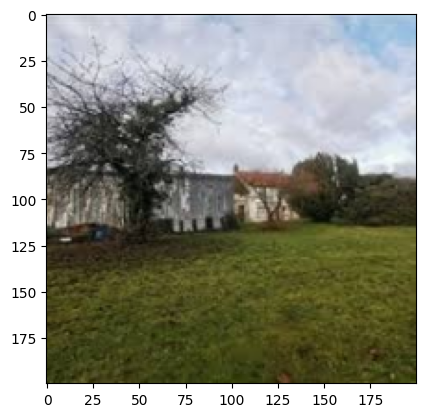

Image: img_train349.png
Shape: (200, 200, 3)
Format: float32


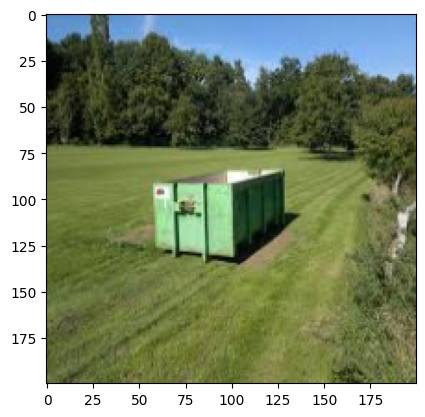

Image: img_train325.png
Shape: (200, 200, 3)
Format: float32


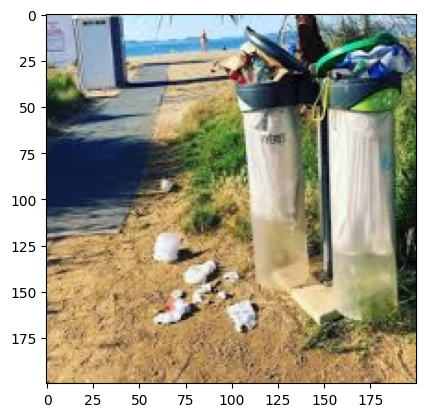

In [ ]:
##AFFICHER LES PNG QUI NE SONT PAS VALIDES (CORROMPUS)
#%pip install pillow
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chemin du dossier contenant les images
v_path = r"C:\Users\gaspa\Downloads\database\train_"

# Récupérer la liste des noms de fichiers d'images
image_files = os.listdir(v_path)

# Sélectionner 10 fichiers d'images de manière aléatoire
selected_images = random.sample(image_files, 10)

# Afficher les images sélectionnées avec leur shape et leur format
for image_file in selected_images:
    image_path = os.path.join(v_path, image_file)
    try:
        image = mpimg.imread(image_path)
        print('Image:', image_file)
        print('Shape:', image.shape)
        print('Format:', image.dtype)
        plt.imshow(image)
        plt.show()
    except:
        print(f"{image_file} n'est pas un fichier PNG valide.")

**On vérifie qu'il en va de même pour toutes les images du dossier**

In [ ]:
from PIL import Image
import os

folder_path = r"C:\Users\gaspa\Downloads\database_origin\test\depots_2" 

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):  
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            print(f"La forme de l'image {filename} est {img.size}")

La forme de l'image depot1.png est (200, 200)
La forme de l'image depot10.png est (200, 200)
La forme de l'image depot11.png est (200, 200)
La forme de l'image depot12.png est (200, 200)
La forme de l'image depot13.png est (200, 200)
La forme de l'image depot14.png est (200, 200)
La forme de l'image depot15.png est (200, 200)
La forme de l'image depot16.png est (200, 200)
La forme de l'image depot17.png est (200, 200)
La forme de l'image depot18.png est (200, 200)
La forme de l'image depot19.png est (200, 200)
La forme de l'image depot2.png est (200, 200)
La forme de l'image depot20.png est (200, 200)
La forme de l'image depot21.png est (200, 200)
La forme de l'image depot22.png est (200, 200)
La forme de l'image depot23.png est (200, 200)
La forme de l'image depot24.png est (200, 200)
La forme de l'image depot25.png est (200, 200)
La forme de l'image depot26.png est (200, 200)
La forme de l'image depot27.png est (200, 200)
La forme de l'image depot28.png est (200, 200)
La forme de l'i

# **Dissection d'une convolution**


**Convolution**

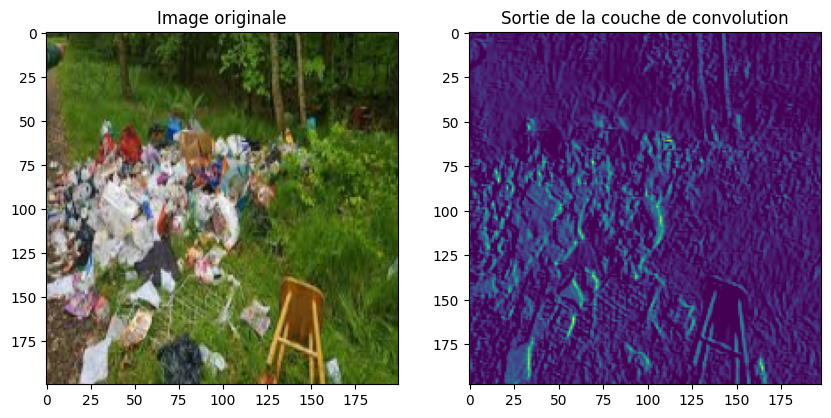

In [ ]:
##CONVOLUTION

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

# Définir le chemin du dossier contenant l'image
img_folder = r'C:\Users\gaspa\Downloads\database_origin\test\depots'

# Charger l'image à l'aide de la bibliothèque Pillow
img_path = os.path.join(img_folder, 'depot12.png')
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(200, 200))

# Convertir l'image en un tableau numpy
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Ajouter une dimension pour représenter le lot
img_array = np.expand_dims(img_array, axis=0)

# Définir une couche de convolution simple avec un noyau de 3x3 et 32 filtres
conv_layer = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3))

# Faire passer l'image par la couche de convolution
conv_output = conv_layer(img_array)

# Afficher l'image originale et la sortie de la couche de convolution
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Image originale')
axs[1].imshow(conv_output[0, :, :, 0])
axs[1].set_title('Sortie de la couche de convolution')
plt.show()


**Pooling**

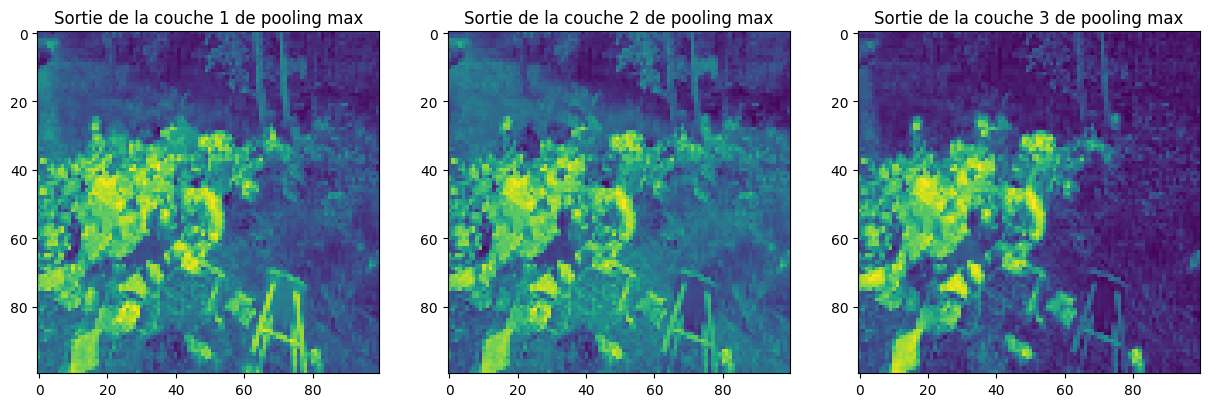

In [ ]:
##POOLING

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

# Définir le chemin du dossier contenant l'image
img_folder = r'C:\Users\gaspa\Downloads\database_origin\test\depots'

# Charger l'image à l'aide de la bibliothèque Pillow
img_path = os.path.join(img_folder, 'depot12.png')
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(200, 200))

# Convertir l'image en un tableau numpy
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Ajouter une dimension pour représenter le lot
img_array = np.expand_dims(img_array, axis=0)

# Définir une couche de convolution simple avec un noyau de 3x3 et 32 filtres
conv_layer = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3))

# Faire passer l'image par la couche de convolution
conv_output = conv_layer(img_array)

# Définir une couche de pooling avec un facteur de sous-échantillonnage de 2x2
pool_layer = tf.keras.layers.MaxPooling2D((2, 2))

# Faire passer la sortie de la couche de convolution par la couche de pooling
pool_output = pool_layer(img_array)

# Definir une couche de pooling moyen
avg_pooling = tf.keras.layers.AvgPool2D(pool_size=2)

# Faire passer l'image par la couche de pooling moyen
output_avg = avg_pooling(img_array)

# Afficher l'image originale, la sortie de la couche de convolution et la sortie de la couche de pooling
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#axs[0].imshow(img)
#axs[0].set_title('Image originale')
#axs[1].imshow(conv_output[0, :, :, 0])
#axs[1].set_title('Sortie de la couche de convolution')
#axs[0].imshow(output_avg[0, :, :, 0])
#axs[0].set_title('Sortie de la couche de pooling moyen')
axs[0].imshow(pool_output[0, :, :, 0])
axs[0].set_title('Sortie de la couche 1 de pooling max')
axs[1].imshow(pool_output[0, :, :, 1])
axs[1].set_title('Sortie de la couche 2 de pooling max')
axs[2].imshow(pool_output[0, :, :, 2])
axs[2].set_title('Sortie de la couche 3 de pooling max')
plt.show()


# **Entraînement des données avec un CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image

# Chemin des dossiers contenant les images
train_dir = r"C:\Users\gaspa\Downloads\database_origin\train"
test_dir = r"C:\Users\gaspa\Downloads\database_origin\test"

# Convertir les images JFIF en JPEG
for filename in os.listdir(train_dir):
    if filename.endswith('.png'):
       # print(filename)
        img = Image.open(os.path.join(train_dir, filename))
        img.save(os.path.join(train_dir, os.path.splitext(filename)[0] + '.png'))

for filename in os.listdir(test_dir):
    if filename.endswith('.png'):
       # print(filename)
        img = Image.open(os.path.join(test_dir, filename))
        img.save(os.path.join(test_dir, os.path.splitext(filename)[0] + '.png'))

np.random.seed(42)
tf.random.set_seed(42)

# Configuration du générateur d'images pour la mise à l'échelle et l'augmentation des données
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Génération des données d'entraînement à partir du dossier train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=4,
    class_mode='categorical',
    color_mode="rgb")

# Configuration du générateur d'images pour la mise à l'échelle des données de test
test_datagen = ImageDataGenerator(rescale=1./255)

# Génération des données de test à partir du dossier test_dir
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=10,
    class_mode='binary')

# Définition du modèle CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilation du modèle
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Entraînement du modèle sur les données d'entraînement
model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=test_generator,
    validation_steps=50)

Found 733 images belonging to 2 classes.
Found 302 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 52s 503ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.4834
Epoch 2/100
100/100 [==============================] - 40s 400ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 40s 401ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/100
100/100 [==============================] - 36s 357ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/100
100/100 [==============================] - 35s 353ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 6/100
100/100 [==============================] - 37s 368ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 7/100
100/100 [==============================] - 35s 350ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/100
100/100 [==============================] - 36s 355ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 9/100
100/100 [=======================

# **Régularisation par dropout**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image

# Chemin des dossiers contenant les images
train_dir = r"C:\Users\gaspa\Downloads\database_origin\train"
test_dir = r"C:\Users\gaspa\Downloads\database_origin\test"

# Convertir les images JFIF en JPEG
for filename in os.listdir(train_dir):
    if filename.endswith('.png'):
       # print(filename)
        img = Image.open(os.path.join(train_dir, filename))
        img.save(os.path.join(train_dir, os.path.splitext(filename)[0] + '.png'))

for filename in os.listdir(test_dir):
    if filename.endswith('.png'):
       # print(filename)
        img = Image.open(os.path.join(test_dir, filename))
        img.save(os.path.join(test_dir, os.path.splitext(filename)[0] + '.png'))

np.random.seed(42)
tf.random.set_seed(42)

# Configuration du générateur d'images pour la mise à l'échelle et l'augmentation des données
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Génération des données d'entraînement à partir du dossier train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=10,
    class_mode='categorical',
    color_mode="rgb")

# Configuration du générateur d'images pour la mise à l'échelle des données de test
test_datagen = ImageDataGenerator(rescale=1./255)

# Génération des données de test à partir du dossier test_dir
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=10,
    class_mode='binary')

# Définition du modèle CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilation du modèle
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Entraînement du modèle sur les données d'entraînement
model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=50,
    validation_data=test_generator,
    validation_steps=50)

Found 733 images belonging to 2 classes.
Found 302 images belonging to 2 classes.
Epoch 1/50
20/20 [==============================] - 21s 936ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.4272
Epoch 2/50
20/20 [==============================] - 13s 619ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 12s 615ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 13s 624ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 13s 612ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 12s 595ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 7/50
20/20 [==============================] - 12s 616ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/50
20/20 [==============================] - 13s 637ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 9/50
20/20 [==============================] - 12s 604ms/step -

# **Régularisation par transfer learning**

In [ ]:
##TRANSFER LEARNING AVEC VGG16

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Chemin des dossiers contenant les images
train_dir = r"C:\Users\gaspa\Downloads\database_origin\train"
test_dir = r"C:\Users\gaspa\Downloads\database_origin\test"

# Configuration du générateur d'images pour la mise à l'échelle et l'augmentation des données
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Génération des données d'entraînement et de validation à partir des dossiers train_dir et test_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200), # Les modèles VGG16 et VGG19 requièrent des images de taille (224, 224)
    batch_size=4,
    class_mode='categorical',
    color_mode="rgb")

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200), # Les modèles VGG16 et VGG19 requièrent des images de taille (224, 224)
    batch_size=4,
    class_mode='categorical',
    color_mode="rgb")

# Chargement du modèle VGG16 pré-entraîné sans la dernière couche
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Congeler toutes les couches du modèle VGG16 pré-entraîné pour éviter qu'elles ne soient mises à jour pendant l'entraînement
for layer in vgg.layers:
    layer.trainable = False

# Ajouter des couches personnalisées au-dessus du modèle VGG16 pré-entraîné
model = tf.keras.models.Sequential([
    vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5), # Ajouter une couche Dropout pour éviter le surapprentissage
    tf.keras.layers.Dense(2, activation='softmax') # La dernière couche doit avoir autant de neurones que le nombre de classes dans le jeu de données personnalisé
])

# Compilation du modèle
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Entraînement du modèle sur les données d'entraînement
model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=test_generator,
    validation_steps=50)

Found 733 images belonging to 2 classes.
Found 302 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 226s 2s/step - loss: 0.5922 - accuracy: 0.7809 - val_loss: 0.5153 - val_accuracy: 0.8200
Epoch 2/50
100/100 [==============================] - 222s 2s/step - loss: 0.3267 - accuracy: 0.8825 - val_loss: 0.3679 - val_accuracy: 0.8100
Epoch 3/50
100/100 [==============================] - 232s 2s/step - loss: 0.3326 - accuracy: 0.8750 - val_loss: 0.6009 - val_accuracy: 0.7500
Epoch 4/50
100/100 [==============================] - 232s 2s/step - loss: 0.2525 - accuracy: 0.9068 - val_loss: 0.3661 - val_accuracy: 0.8450
Epoch 5/50
100/100 [==============================] - 225s 2s/step - loss: 0.2829 - accuracy: 0.8925 - val_loss: 0.3383 - val_accuracy: 0.8800
Epoch 6/50
100/100 [==============================] - 167s 2s/step - loss: 0.2785 - accuracy: 0.8992 - val_loss: 0.3312 - val_accuracy: 0.8900
Epoch 7/50
100/100 [==============================] - 208s 2

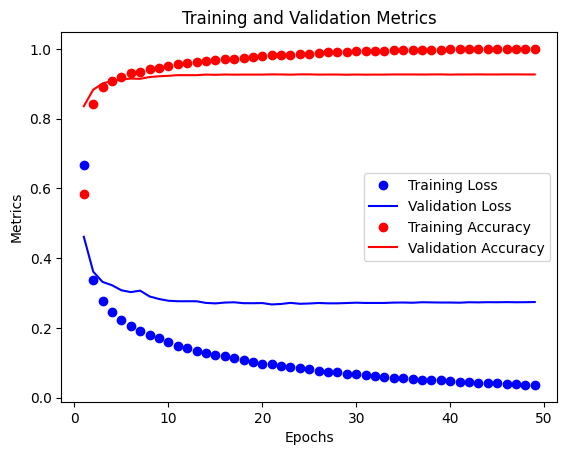

In [6]:
import matplotlib.pyplot as plt

# les donneés
loss = [0.6659, 0.3381, 0.2774, 0.2455, 0.2215, 0.2045, 0.1915, 0.1785, 0.1702, 0.1587, 0.1493, 0.1419, 0.1345, 0.1291, 0.1223, 0.1183, 0.1149, 0.1079, 0.1028, 0.0979, 0.0951, 0.0918, 0.0879, 0.0842, 0.0820, 0.0777, 0.0738, 0.0724, 0.0684, 0.0664, 0.0650, 0.0620, 0.0599, 0.0577, 0.0563, 0.0536, 0.0513, 0.0507, 0.0493, 0.0469, 0.0452, 0.0442, 0.0434, 0.0426, 0.0414, 0.0396, 0.0385, 0.0375, 0.0365]
accuracy = [0.5849, 0.8425, 0.8893, 0.9073, 0.9201, 0.9297, 0.9349, 0.9421, 0.9453, 0.9513, 0.9553, 0.9589, 0.9621, 0.9649, 0.9677, 0.9697, 0.9709, 0.9749, 0.9773, 0.9793, 0.9809, 0.9821, 0.9837, 0.9853, 0.9861, 0.9881, 0.9897, 0.9909, 0.9913, 0.9929, 0.9933, 0.9937, 0.9949, 0.9953, 0.9961, 0.9965, 0.9973, 0.9977, 0.9977, 0.9981, 0.9989, 0.9993, 0.9993, 0.9993, 0.9993, 0.9993, 0.9993, 0.9997, 0.9997]
val_loss = [0.4611, 0.3612, 0.3317, 0.3223, 0.3078, 0.3026, 0.3067, 0.2901, 0.2829, 0.2778, 0.2764, 0.2764, 0.2763, 0.2716, 0.2702, 0.2726, 0.2734, 0.2708, 0.2707, 0.2712, 0.2672, 0.2686, 0.2717, 0.2691, 0.2699, 0.2714, 0.2704, 0.2704, 0.2713, 0.2722, 0.2715, 0.2715, 0.2715, 0.2725, 0.2727, 0.2721, 0.2735, 0.2731, 0.2727, 0.2727, 0.2722, 0.2735, 0.2731, 0.2737, 0.2735, 0.2739, 0.2735, 0.2737, 0.2741]
val_accuracy = [0.8356, 0.8827, 0.9008, 0.9079, 0.9124, 0.9146, 0.9141, 0.9191, 0.9213, 0.9226, 0.9245, 0.9245, 0.9245, 0.9261, 0.9255, 0.9263, 0.9259, 0.9261, 0.9261, 0.9261, 0.9267, 0.9265, 0.9259, 0.9267, 0.9267, 0.9261, 0.9263, 0.9263, 0.9257, 0.9263, 0.9259, 0.9261, 0.9261, 0.9265, 0.9265, 0.9265, 0.9263, 0.9265, 0.9267, 0.9261, 0.9265, 0.9265, 0.9267, 0.9265, 0.9265, 0.9267, 0.9267, 0.9265, 0.9265]

# tracer le graphique
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()


# **Detection temps réel**

In [ ]:
# DETECTION DES CLASSES EN TEMPS REEL PAR LE CNN SUR UNE VIDEO

import cv2
import tensorflow as tf
import numpy as np

# Charger le modèle CNN pré-entraîné
model = model

# Définir les classes que le modèle peut reconnaître
classes = ["depots", "friches"]

# Définir les couleurs pour les boîtes englobantes et les labels
colors = [(0, 255, 0), (0, 0, 255)]

# Charger la vidéo
cap = cv2.VideoCapture(r'C:\Users\gaspa\Downloads\ressources\video_test.mp4')

# Récupérer les dimensions de la vidéo
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Créer le fichier vidéo de sortie
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, fps, (width, height))

# Boucle sur les images de la vidéo
while(cap.isOpened()):
    # Lire l'image suivante
    ret, frame = cap.read()
    if not ret:
        break
    
    # Redimensionner l'image pour qu'elle corresponde aux dimensions d'entrée du modèle
    input_image = cv2.resize(frame, (200, 200))
    
    # Prétraiter l'image pour la passer en entrée du modèle
    input_image = input_image.astype(np.float32) / 255.0
    input_image = np.expand_dims(input_image, axis=0)
    
    # Faire une prédiction avec le modèle
    predictions = model.predict(input_image)[0]
    
    # Trouver la classe la plus probable pour chaque prédiction
    class_idx = np.argmax(predictions)
    class_prob = predictions[class_idx]
    class_label = classes[class_idx]
    
    # Dessiner une boîte englobante autour de l'objet détecté
    color = colors[class_idx]
    cv2.rectangle(frame, (0, 0), (200, 30), (255,255,255), -1)
    cv2.putText(frame, f"{class_label}: {class_prob:.2f}", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.rectangle(frame, (0, 0), (width, height), color, 2)
    
    # Écrire l'image avec les boîtes englobantes dans le fichier vidéo de sortie
    out.write(frame)

# Fermer la vidéo et le fichier de sortie
cap.release()
out.release()
cv2

1/1 [==============================] - 0s 371ms/step


<module 'cv2' from 'c:\\Users\\gaspa\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\cv2\\__init__.py'>

In [ ]:
import cv2
import tensorflow as tf
import numpy as np

# Charger le modèle CNN pré-entraîné
model = model

# Définir les classes que le modèle peut reconnaître
classes = ["depots", "friches"]

# Définir les couleurs pour les boîtes englobantes et les labels
colors = [(0, 255, 0), (0, 0, 255)]

# Charger la vidéo
cap = cv2.VideoCapture(r'C:\Users\gaspa\Downloads\ressources\video_test.mp4')

# Récupérer les dimensions de la vidéo
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Créer le fichier vidéo de sortie
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

# Boucle sur les images de la vidéo
while(cap.isOpened()):
    # Lire l'image suivante
    ret, frame = cap.read()
    if not ret:
        break
    
    # Redimensionner l'image pour qu'elle corresponde aux dimensions d'entrée du modèle
    input_image = cv2.resize(frame, (200, 200))
    
    # Prétraiter l'image pour la passer en entrée du modèle
    input_image = input_image.astype(np.float32) / 255.0
    input_image = np.expand_dims(input_image, axis=0)
    
    # Faire une prédiction avec le modèle
    predictions = model.predict(input_image)[0]
    
    # Trouver la classe la plus probable pour chaque prédiction
    class_idx = np.argmax(predictions)
    class_prob = predictions[class_idx]
    class_label = classes[class_idx]
    
    # Récupérer les dimensions de la boîte englobante autour de l'objet détecté
    _, contours, _ = cv2.findContours(cv2.inRange(predictions, class_prob, class_prob), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x,y,w,h = cv2.boundingRect(contours[0])
    
    # Dessiner une boîte englobante autour de l'objet détecté
    color = colors[class_idx]
    cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
    cv2.putText(frame, f"{class_label}: {class_prob:.2f}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2, cv2.LINE_AA)
    
    # Écrire l'image avec les boîtes englobantes dans le fichier vidéo de sortie
    out.write(frame)

# Fermer la vidéo et le fichier de sortie
cap.release()
out.release()
cv2.destroyAllWindows()